### Технологии искусственного интеллекта. Лабораторная работа №2. 6132 Носов Никита

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
Также можно сконвертировать в DataFrame любой из встроенных датасетов `sklearn`: (см. [инструкцию](https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset)).  
   > Главное условие к датасету, который вы загружаете - там должны быть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий.


In [ ]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


2. Привести описание датасета.  

Датасет содержит информацию о пингвинах с островов в Южном океане. Цель – анализ биометрических данных и видовых характеристик.

| Признак         | Описание                                       | Единицы измерения        |
|-----------------|------------------------------------------------|--------------------------|
| species         | Вид пингвина                                   | категориальный           |
| island          | Остров, на котором обитают пингвины            | категориальный           |
| bill_length_mm  | Длина клюва                                     | миллиметры (mm)          |
| bill_depth_mm   | Глубина клюва                                  | миллиметры (mm)          |
| flipper_length_mm | Длина плавника                                | миллиметры (mm)          |
| body_mass_g     | Масса тела                                    | граммы (g)               |
| sex             | Пол                                            | категориальный (male/female) |

3. `matplotlib`:  
   - Построить несколько графиков разного вида с использованием `matplotlib`.  
   - Построить несколько суб-графиков на одном графике используя `.subplot`.  
   - Построить интерактивный график со слайдером.
   
   > - Графики должны быть разных видов.  
   > - Хотя бы в одном графике необходимо подписать оси.  
   > - Во всех графиках необходимо указать название.
   > - Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.


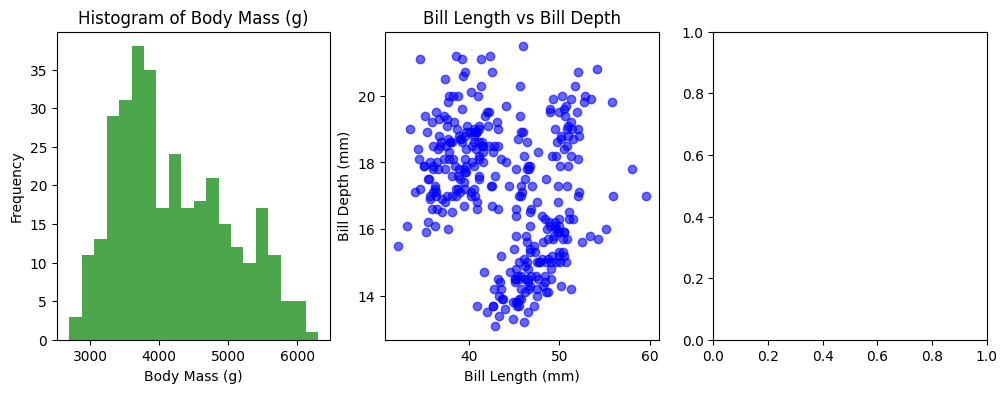

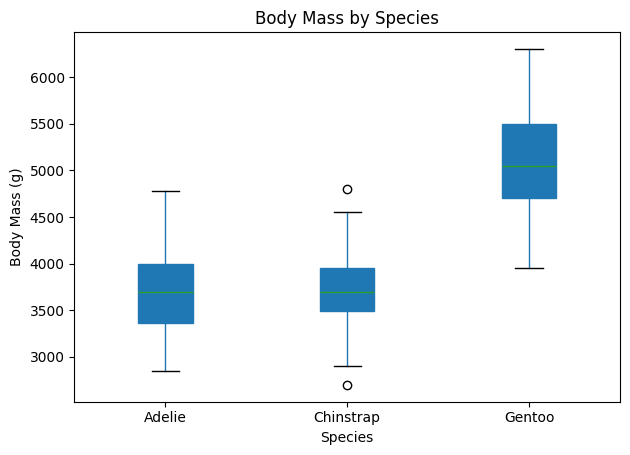

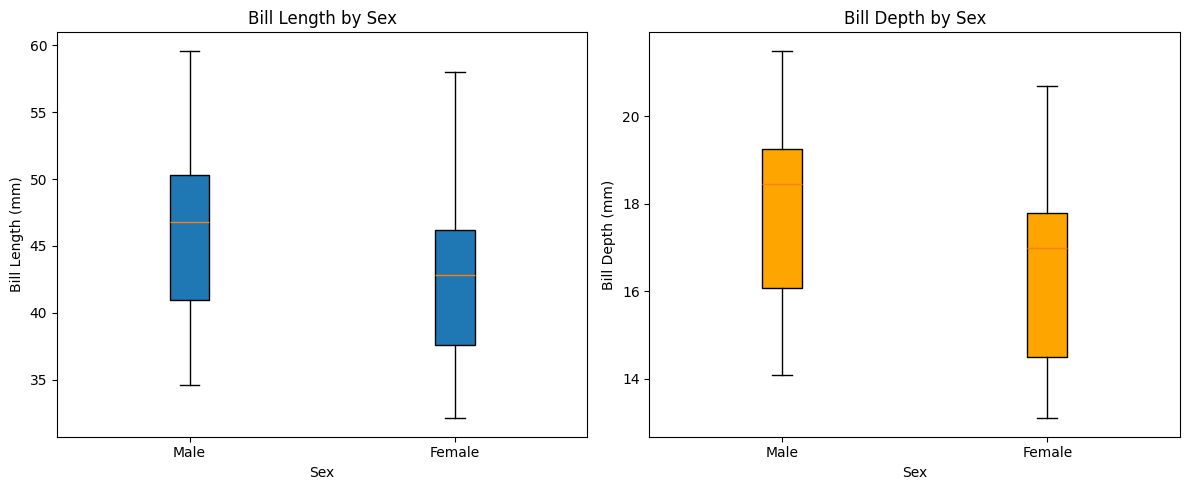

interactive(children=(IntSlider(value=0, description='i', max=2), Output()), _dom_classes=('widget-interact',)…

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact, IntSlider

penguins = sns.load_dataset('penguins').dropna()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(penguins['body_mass_g'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.scatter(penguins['bill_length_mm'], penguins['bill_depth_mm'], alpha=0.6, color='blue')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

plt.subplot(1, 3, 3)
penguins.boxplot(column='body_mass_g', by='species', grid=False, patch_artist=True)
plt.title('Body Mass by Species')
plt.suptitle('')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].boxplot([penguins.loc[penguins.sex == sex, 'bill_length_mm'] for sex in penguins.sex.unique()],
               patch_artist=True)
axs[0].set_xticklabels(penguins.sex.unique())
axs[0].set_title('Bill Length by Sex')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Bill Length (mm)')

axs[1].boxplot([penguins.loc[penguins.sex == sex, 'bill_depth_mm'] for sex in penguins.sex.unique()],
               patch_artist=True, boxprops=dict(facecolor="orange"))
axs[1].set_xticklabels(penguins.sex.unique())
axs[1].set_title('Bill Depth by Sex')
axs[1].set_xlabel('Sex')
axs[1].set_ylabel('Bill Depth (mm)')

plt.tight_layout()
plt.show()


species_list = list(penguins['species'].unique())

def plot_species(i=0):
    sel_species = species_list[i]
    data = penguins[penguins['species'] == sel_species]
    plt.figure(figsize=(7,5))
    plt.scatter(data['bill_length_mm'], data['body_mass_g'], c='red', alpha=0.7)
    plt.title(f'Bill Length vs Body Mass: {sel_species}')
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Body Mass (g)')
    plt.xlim(penguins['bill_length_mm'].min() - 1, penguins['bill_length_mm'].max() + 1)
    plt.ylim(penguins['body_mass_g'].min() - 100, penguins['body_mass_g'].max() + 100)
    plt.show()

interact(plot_species, i=IntSlider(min=0, max=len(species_list)-1, step=1, value=0));

4. `pandas`:  
   - Построить три разных вида графиков с использованием `pandas.DataFrame.plot` / `Series.plot`.  
   
   > - Среди графиков должен присутствовать один `boxplot` (обязательно надо использовать параметр `by`, для исследования взаимосвязи числовой переменной и какой-либо другой).  
   > - Графики должны быть построены как через методы `DataFrame`, так и через методы `Series`. То есть оба варианта нужно продемонстрировать.

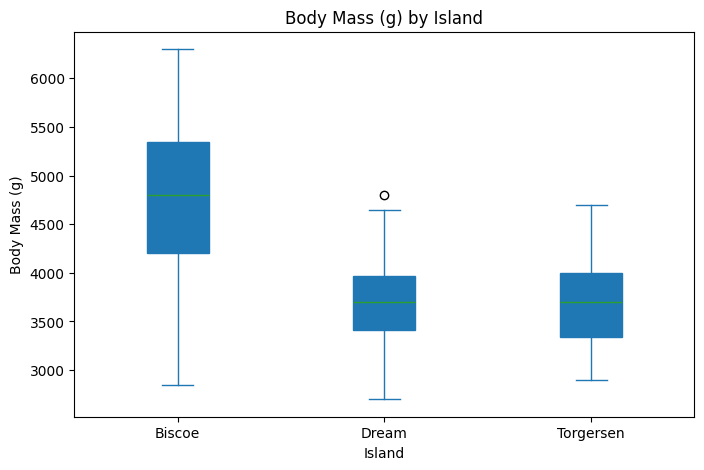

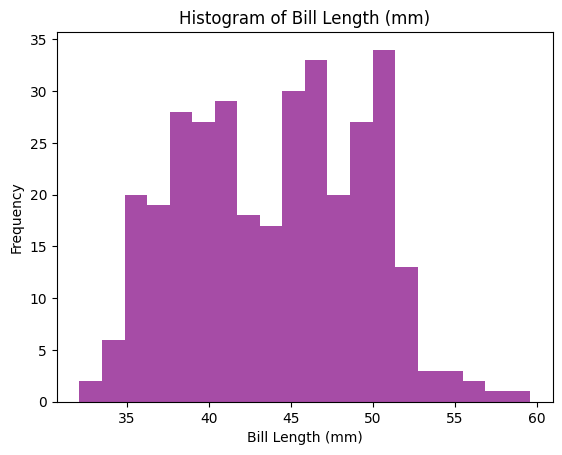

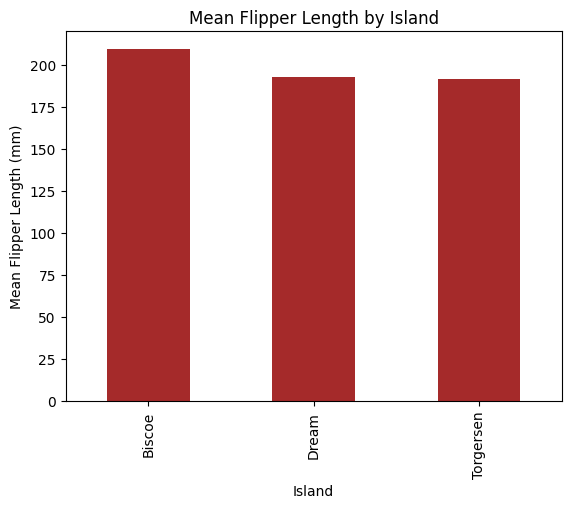

In [ ]:
penguins.plot(kind='box', column='body_mass_g', by='island', grid=False, figsize=(8,5), patch_artist=True)
plt.title('Body Mass (g) by Island')
plt.suptitle('')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()

penguins['bill_length_mm'].plot(kind='hist', bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Bill Length (mm)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

mean_flipper = penguins.groupby('island')['flipper_length_mm'].mean()
mean_flipper.plot(kind='bar', color='brown')
plt.title('Mean Flipper Length by Island')
plt.xlabel('Island')
plt.ylabel('Mean Flipper Length (mm)')
plt.show()

5. `seaborn`:  
   - Построить `.pairplot` на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.  
   - Построить `.jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков.  
   - Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.  
   - Построить график `.heatmap` попарной корреляции всех числовых признаков.  
   
     > Категориальные признаки необходимо убрать из датафрейма перед построением.  

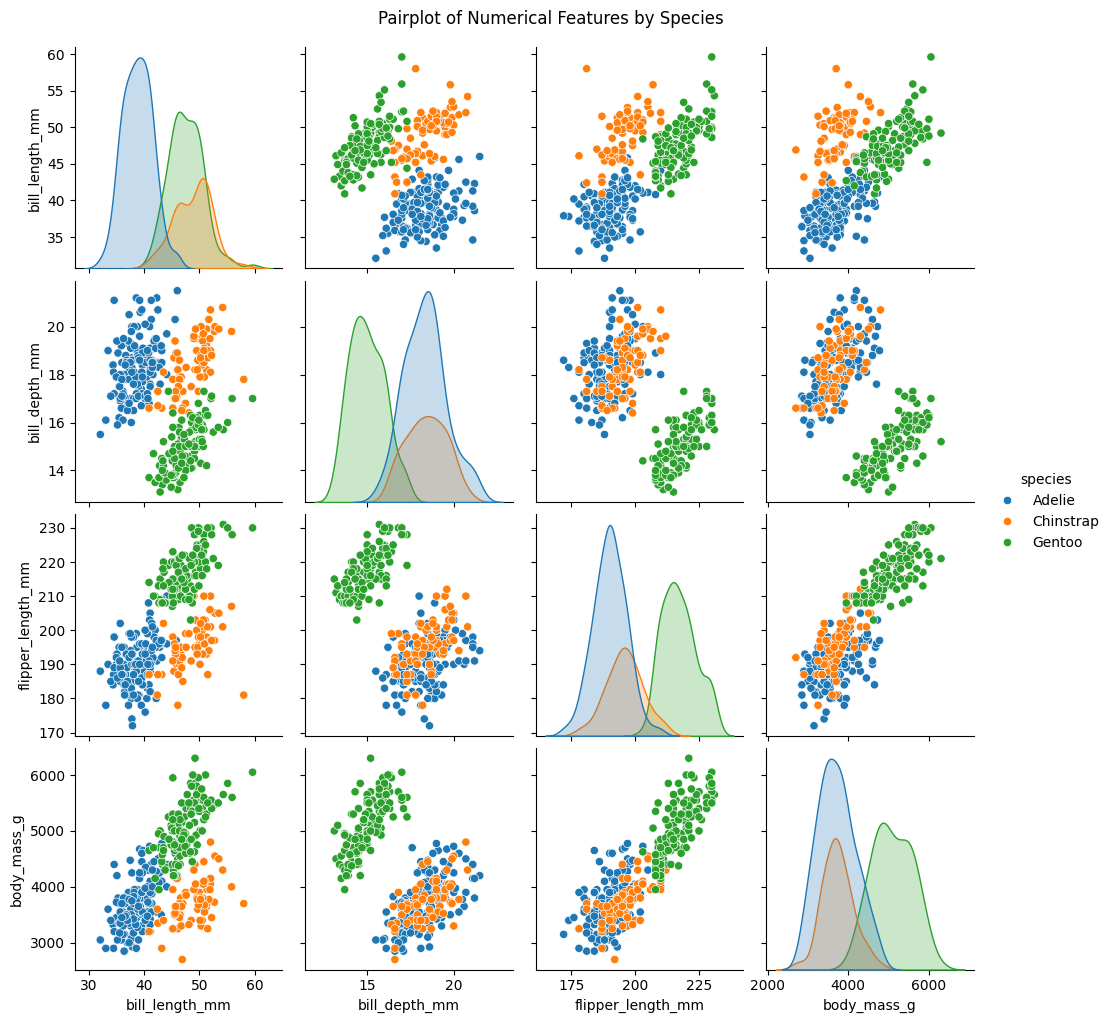

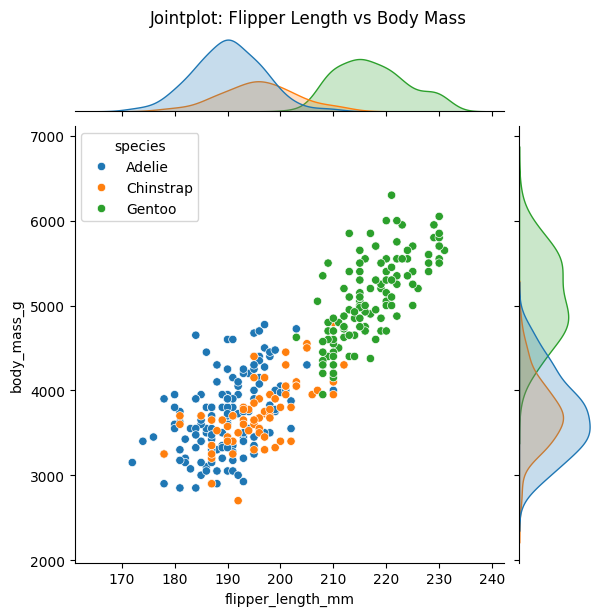

<ipython-input-13-4f29ff7432a7>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




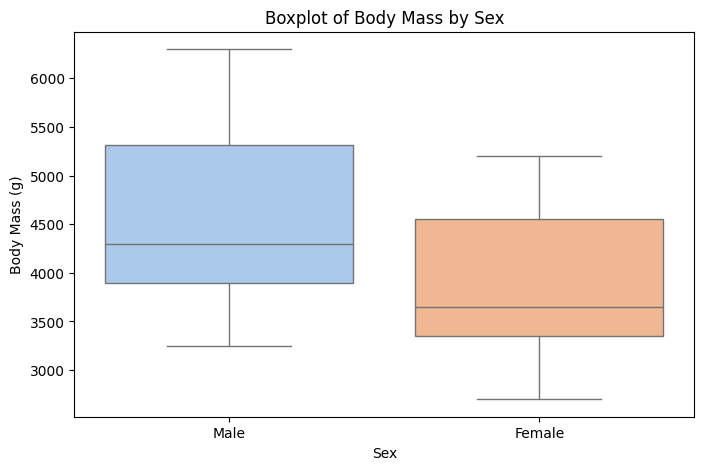

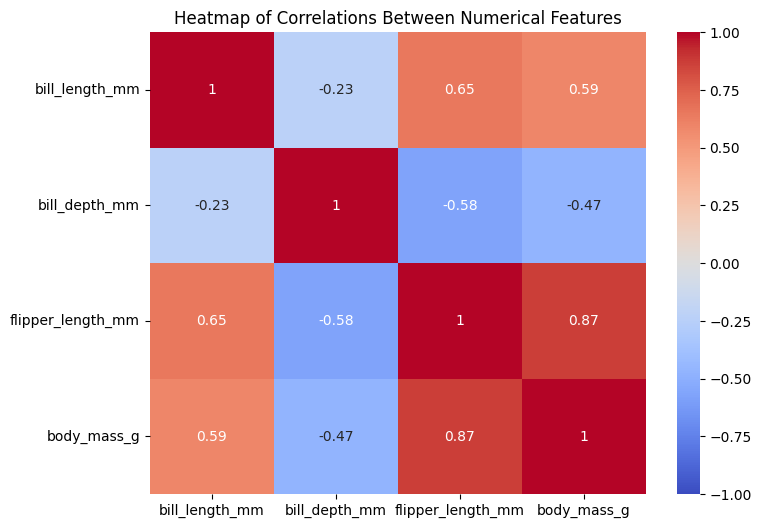

In [ ]:

sns.pairplot(penguins, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='species')
plt.suptitle('Pairplot of Numerical Features by Species', y=1.02)
plt.show()


sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='scatter', hue='species')
plt.suptitle('Jointplot: Flipper Length vs Body Mass', y=1.02)
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(data=penguins, x='sex', y='body_mass_g', palette='pastel')
plt.title('Boxplot of Body Mass by Sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (g)')
plt.show()


numeric_cols = penguins.select_dtypes(include='number').columns
corr = penguins[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations Between Numerical Features')
plt.show()

6. `scipy.stats`:  
   - Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.  

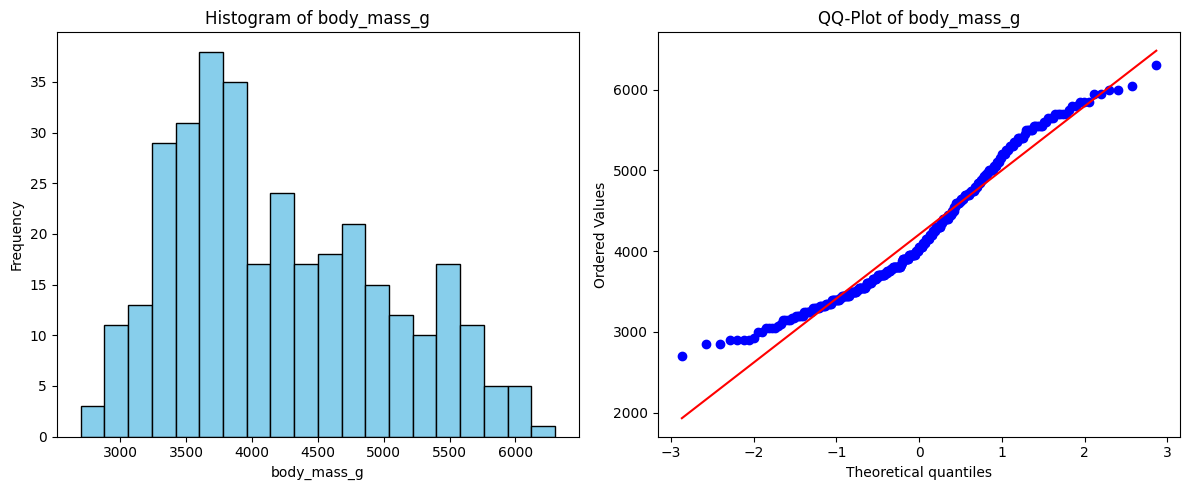

In [ ]:
from scipy import stats

feature = 'body_mass_g'
data = penguins[feature]

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].hist(data, bins=20, color='skyblue', edgecolor='black')
axs[0].set_title(f'Histogram of {feature}')
axs[0].set_xlabel(feature)
axs[0].set_ylabel('Frequency')

stats.probplot(data, dist="norm", plot=axs[1])
axs[1].set_title(f'QQ-Plot of {feature}')

plt.tight_layout()
plt.show()

7. `plotly`:  
   - Построить несколько графиков разного вида.  
   - Построить несколько суб-графиков на одном графике.  
   - Построить интерактивный график.  
   
     > Использование `Dash` опционально.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig1 = px.scatter(penguins, x='bill_length_mm', y='bill_depth_mm', color='species',
                  title='Bill Length vs Bill Depth by Species')
fig1.show()

fig2 = px.box(penguins, x='island', y='body_mass_g', color='island',
              title='Body Mass Distribution by Island')
fig2.show()

mean_mass_species = penguins.groupby('species')['body_mass_g'].mean().reset_index()
fig3 = px.bar(mean_mass_species, x='species', y='body_mass_g',
              title='Mean Body Mass by Species')
fig3.show()


fig = make_subplots(rows=1, cols=2, subplot_titles=(
    'Scatter: Bill Length vs Depth', 'Boxplot: Body Mass by Species'))

fig.add_trace(
    go.Scatter(
        x=penguins['bill_length_mm'],
        y=penguins['bill_depth_mm'],
        mode='markers',
        marker=dict(color=penguins['species'].astype('category').cat.codes),
        showlegend=False),
    row=1, col=1)

for sp in penguins['species'].unique():
    fig.add_trace(
        go.Box(y=penguins[penguins['species'] == sp]['body_mass_g'], name=sp),
        row=1, col=2)

fig.update_layout(title_text='Plotly Subplots Example', showlegend=False)
fig.show()



species_unique = penguins['species'].unique()

fig = go.Figure()

for sp in species_unique:
    df_sp = penguins[penguins['species'] == sp]
    fig.add_trace(go.Scatter(
        x=df_sp['bill_length_mm'],
        y=df_sp['body_mass_g'],
        mode='markers',
        name=sp,
        visible=(sp == species_unique[0])
    ))

steps = []
for i, sp in enumerate(species_unique):
    step = dict(
        method='update',
        args=[{'visible': [j == i for j in range(len(species_unique))]},
              {'title': f"Bill Length vs Body Mass for {sp}"}],
        label=sp
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Species: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title=f"Bill Length vs Body Mass for {species_unique[0]}",
    xaxis_title='Bill Length (mm)',
    yaxis_title='Body Mass (g)'
)

fig.show()